# Aprendizagem de Máquina - Relatório 2

## Questão 1

### Objetivos

Nesta questão, o objetivo é desenvolver um algoritmo que implemente o LVQ1, LVQ2.1 e LVQ3 para geração de protótipos. Logo após, o classificador k-NN (k={1,3}) junto com duas bases de dados do Promise serão utilizados para avaliar a implementação dos algoritmos, onde será mostrado o comportamento para diferentes conjuntos de protótipos.

### Meotodologia

Para a avaliação dos algoritmos propostos pela questão, foram utilizados duas bases de dados obtidas no Promise Repository (http://promise.site.uottawa.ca/SERepository/datasets-page.html). O primeiro deles foi o "JM1/Software defect prediction" e o segundo foi o "KC1/Software defect prediction". As duas bases de dados estavam contidas cada uma em um arquivo ARFF (Atribute-Relation File Format), onde cada linha representa uma instância e as colunas representam os atributos juntamente com as classes. Para a leitura deste formato de arquivo foi utilizado o método arff da biblioteca Scipy para Python assim como a biblioteca Pandas que é voltada para a análise de dados. A biblioteca Matplotlib também foi utilizada para gerar os gráficos utilizados na análise. Na base de dados "JM1/Software defect prediction" foi detectado que para algumas instâncias havia atributos ausentes, desta forma um tratamento prévio dos dados foi feito.

In [10]:
from lvq import *
from scipy.io import arff
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from math import isnan
import matplotlib.pyplot as plt

Abaixo segue um resumo da base de dados "JM1/Software defect prediction"

In [5]:
data_1 = arff.loadarff('datasets/jm1.arff')
df_1 = pd.DataFrame(data_1[0])
data_1 = df_1.values
df_1.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,b'false'
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,b'true'
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51.0,10.0,8.0,1.0,17.0,36.0,112.0,86.0,13.0,b'true'
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129.0,29.0,28.0,2.0,17.0,135.0,329.0,271.0,5.0,b'true'
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28.0,1.0,6.0,0.0,11.0,16.0,76.0,50.0,7.0,b'true'


In [7]:
df_1.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.00000,1.088000e+04,...,1.088000e+04,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000
mean,42.020138,6.347739,3.400037,4.001415,114.391388,673.772003,0.135352,14.177339,29.43885,3.684563e+04,...,2.046980e+03,26.253125,2.738787,4.625092,0.370956,11.177592,16.751857,68.110588,46.388989,11.292316
std,76.608641,13.021924,6.772697,9.118682,249.549291,1939.253379,0.160552,18.712325,34.42332,4.344671e+05,...,2.413706e+04,59.622819,9.010486,9.969914,1.908391,10.045255,26.667883,151.513836,100.351845,22.597617
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.86000,1.619400e+02,...,9.000000e+00,4.000000,0.000000,0.000000,0.000000,5.000000,4.000000,8.000000,6.000000,3.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.92500,2.031020e+03,...,1.128300e+02,13.000000,0.000000,2.000000,0.000000,11.000000,11.000000,29.000000,19.000000,5.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,620.850000,0.160000,18.902500,36.78000,1.141614e+04,...,6.342350e+02,28.000000,2.000000,5.000000,0.000000,16.000000,21.000000,71.000000,48.000000,13.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.78000,3.107978e+07,...,1.726655e+06,2824.000000,344.000000,447.000000,108.000000,411.000000,1026.000000,5420.000000,3021.000000,826.000000


Um desbalanceamento entre as classes é notado no gráfico abaixo:

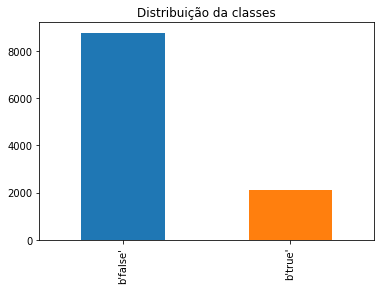

In [18]:
plot_1 = df_1['defects'].value_counts().plot(kind='bar', title='Distribuição da classes')

Agora analisando a base de dados "KC1/Software defect prediction", temos:

In [19]:
data_2 = arff.loadarff('datasets/kc1.arff')
df_2 = pd.DataFrame(data_2[0])
data_2 = df_2.values
df_2.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,b'false'
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,b'true'
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65.0,10.0,6.0,0.0,18.0,25.0,107.0,64.0,21.0,b'true'
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37.0,2.0,5.0,0.0,16.0,28.0,89.0,52.0,15.0,b'true'
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21.0,0.0,2.0,0.0,11.0,10.0,41.0,17.0,5.0,b'true'


In [20]:
df_2.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,...,2109.00000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,20.372262,2.838028,1.674443,2.546420,49.829445,258.696719,0.319583,6.771242,21.240071,5242.386240,...,291.24504,14.525367,0.945946,1.759602,0.132764,7.631674,9.537316,31.043717,18.786724,4.665908
std,29.754442,3.900763,2.200659,3.375859,83.599874,516.317605,0.317029,7.863646,21.500367,17444.981211,...,969.16516,24.188302,3.085271,3.856850,0.704023,5.730347,12.195727,51.776056,32.074398,7.792206
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000,4.000000,8.000000,0.080000,1.500000,5.330000,12.000000,...,0.67000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,1.000000,1.000000
50%,9.000000,1.000000,1.000000,1.000000,16.000000,57.060000,0.200000,3.500000,14.400000,213.970000,...,11.89000,5.000000,0.000000,0.000000,0.000000,6.000000,5.000000,10.000000,6.000000,1.000000
75%,24.000000,3.000000,1.000000,3.000000,58.000000,265.930000,0.670000,9.200000,29.850000,2276.020000,...,126.45000,17.000000,0.000000,2.000000,0.000000,11.000000,13.000000,36.000000,22.000000,5.000000
max,288.000000,45.000000,26.000000,45.000000,1106.000000,7918.820000,2.000000,53.750000,193.060000,324803.510000,...,18044.64000,262.000000,44.000000,58.000000,12.000000,37.000000,120.000000,678.000000,428.000000,89.000000


Assim como a primeira base de dados, podemos observar aqui também uma desproporção entre as classes do problema:

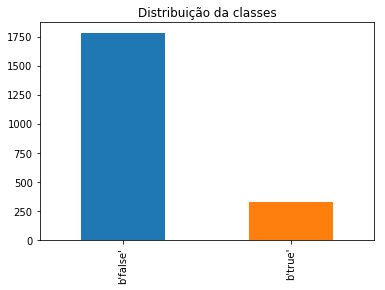

In [21]:
plot_2 = df_2['defects'].value_counts().plot(kind='bar', title='Distribuição da classes')

Os algoritmos LVQ1, LVQ2.1 e LVQ3 foram implementados em Python e se econtram no diretório "src/" no arquivo "lvq.py". Para o k-NN foi utilizado a solução fornecida pela biblitoteca scikit-learn (http://scikit-learn.org/stable/).

### Resultados

In [3]:
df['defects'] = pd.factorize(df['defects'])[0] + 1
df_norm = (df.iloc[:,:-1] - df.iloc[:,:-1].mean()) / (df.iloc[:,:-1].max() - df.iloc[:,:-1].min())
df_norm['defects'] = df['defects']
data = df_norm.values
np.random.shuffle(data)

In [4]:
prototypes = lvq_1(data, 200, 0.3)
df_norm.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,-0.011892,-0.010550,-0.012195,-0.006487,-0.013398,-0.008318,0.895883,-0.030792,-0.049385,-0.001185,...,-0.008588,-0.002148,-0.005873,0.015084,-0.024276,-0.015158,-0.012345,-0.014958,-0.011991,1
1,-0.011921,-0.011402,-0.014634,-0.007485,-0.013433,-0.008322,0.665114,-0.031510,-0.049912,-0.001185,...,-0.008942,-0.005055,-0.008110,0.005824,-0.024763,-0.015353,-0.012382,-0.015024,-0.012476,2
2,0.008713,0.001391,-0.014634,0.004984,0.009905,0.005694,-0.065655,0.014664,0.046353,-0.000445,...,0.008763,0.021108,0.007550,0.005824,0.014166,0.018760,0.008098,0.013112,0.002070,2
3,0.043005,-0.007138,-0.014634,-0.002497,0.057530,0.045458,-0.057963,0.006893,0.395646,0.001202,...,0.036383,0.076341,0.052293,0.015084,0.014166,0.115252,0.048135,0.074350,-0.007627,2
4,-0.001459,-0.005006,-0.014634,-0.000004,0.001375,-0.000923,-0.057963,0.007204,0.009514,-0.000854,...,0.000619,-0.005055,0.003076,-0.003435,-0.000432,-0.000733,0.001456,0.001195,-0.005203,2


In [5]:
x_train = np.asarray(prototypes)[:,:-1]
y_train = np.asarray(prototypes)[:,-1]
x_test = np.asarray(data)[:,:-1]
y_test = np.asarray(data)[:,-1]

In [6]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=4)
knn.fit(x_train, y_train)
predicts = knn.predict(x_test)
print(((predicts == y_test).sum()/len(predicts))*100)

80.74448529411765


In [7]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=4)
knn.fit(x_train, y_train)
predicts = knn.predict(x_test)
print(((predicts == y_test).sum()/len(predicts))*100)

80.60661764705883


In [8]:
prototypes = lvq_21(data, 200, 0.3)
df_norm.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,-0.011892,-0.010550,-0.012195,-0.006487,-0.013398,-0.008318,0.895883,-0.030792,-0.049385,-0.001185,...,-0.008588,-0.002148,-0.005873,0.015084,-0.024276,-0.015158,-0.012345,-0.014958,-0.011991,1
1,-0.011921,-0.011402,-0.014634,-0.007485,-0.013433,-0.008322,0.665114,-0.031510,-0.049912,-0.001185,...,-0.008942,-0.005055,-0.008110,0.005824,-0.024763,-0.015353,-0.012382,-0.015024,-0.012476,2
2,0.008713,0.001391,-0.014634,0.004984,0.009905,0.005694,-0.065655,0.014664,0.046353,-0.000445,...,0.008763,0.021108,0.007550,0.005824,0.014166,0.018760,0.008098,0.013112,0.002070,2
3,0.043005,-0.007138,-0.014634,-0.002497,0.057530,0.045458,-0.057963,0.006893,0.395646,0.001202,...,0.036383,0.076341,0.052293,0.015084,0.014166,0.115252,0.048135,0.074350,-0.007627,2
4,-0.001459,-0.005006,-0.014634,-0.000004,0.001375,-0.000923,-0.057963,0.007204,0.009514,-0.000854,...,0.000619,-0.005055,0.003076,-0.003435,-0.000432,-0.000733,0.001456,0.001195,-0.005203,2


In [9]:
x_train = np.asarray(prototypes)[:,:-1]
y_train = np.asarray(prototypes)[:,-1]
x_test = np.asarray(data)[:,:-1]
y_test = np.asarray(data)[:,-1]

In [10]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=4)
knn.fit(x_train, y_train)
predicts = knn.predict(x_test)
print(((predicts == y_test).sum()/len(predicts))*100)

79.86213235294117


In [11]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=4)
knn.fit(x_train, y_train)
predicts = knn.predict(x_test)
print(((predicts == y_test).sum()/len(predicts))*100)

81.11213235294117


In [12]:
prototypes = lvq_3(data, 200, 0.3)
df_norm.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,-0.011892,-0.010550,-0.012195,-0.006487,-0.013398,-0.008318,0.895883,-0.030792,-0.049385,-0.001185,...,-0.008588,-0.002148,-0.005873,0.015084,-0.024276,-0.015158,-0.012345,-0.014958,-0.011991,1
1,-0.011921,-0.011402,-0.014634,-0.007485,-0.013433,-0.008322,0.665114,-0.031510,-0.049912,-0.001185,...,-0.008942,-0.005055,-0.008110,0.005824,-0.024763,-0.015353,-0.012382,-0.015024,-0.012476,2
2,0.008713,0.001391,-0.014634,0.004984,0.009905,0.005694,-0.065655,0.014664,0.046353,-0.000445,...,0.008763,0.021108,0.007550,0.005824,0.014166,0.018760,0.008098,0.013112,0.002070,2
3,0.043005,-0.007138,-0.014634,-0.002497,0.057530,0.045458,-0.057963,0.006893,0.395646,0.001202,...,0.036383,0.076341,0.052293,0.015084,0.014166,0.115252,0.048135,0.074350,-0.007627,2
4,-0.001459,-0.005006,-0.014634,-0.000004,0.001375,-0.000923,-0.057963,0.007204,0.009514,-0.000854,...,0.000619,-0.005055,0.003076,-0.003435,-0.000432,-0.000733,0.001456,0.001195,-0.005203,2


In [13]:
x_train = np.asarray(prototypes)[:,:-1]
y_train = np.asarray(prototypes)[:,-1]
x_test = np.asarray(data)[:,:-1]
y_test = np.asarray(data)[:,-1]

In [14]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=4)
knn.fit(x_train, y_train)
predicts = knn.predict(x_test)
print(((predicts == y_test).sum()/len(predicts))*100)

81.13051470588235


In [15]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=4)
knn.fit(x_train, y_train)
predicts = knn.predict(x_test)
print(((predicts == y_test).sum()/len(predicts))*100)

80.80882352941177
